# AGEB locator for Tec-MIT challenge
We will use the *geopandas* module to open the shapefiles to access the variables in the file and the polygons of the AGEBs. The shapefile and the data is the folder 'AGEBs Culiacan'. The data collected is the excel file equipo22_Database.csv

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Read shapefile in folder AGEB Urbano
gdf = gpd.read_file('AGEBs Culiacan/2020_25006_A25112024_0209.shp')
gdf.tail()

,GUID,CVE_GEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,EDICION,VERSION,geometry
635,193595751,2500603124153,25,006,0312,4153,2020,1,"POLYGON ((-107.38585 24.5829, -107.38587 24.58..."
636,193596069,2500600019506,25,006,0001,9506,2020,1,"POLYGON ((-107.36689 24.73763, -107.36679 24.7..."
637,193595823,2500600013367,25,006,0001,3367,2020,1,"POLYGON ((-107.38603 24.81205, -107.38601 24.8..."
638,193595574,2500600016361,25,006,0001,6361,2020,1,"POLYGON ((-107.36697 24.77512, -107.36764 24.7..."
639,193595995,2500600018813,25,006,0001,8813,2020,1,"POLYGON ((-107.45018 24.79211, -107.4539 24.78..."


<Axes: >

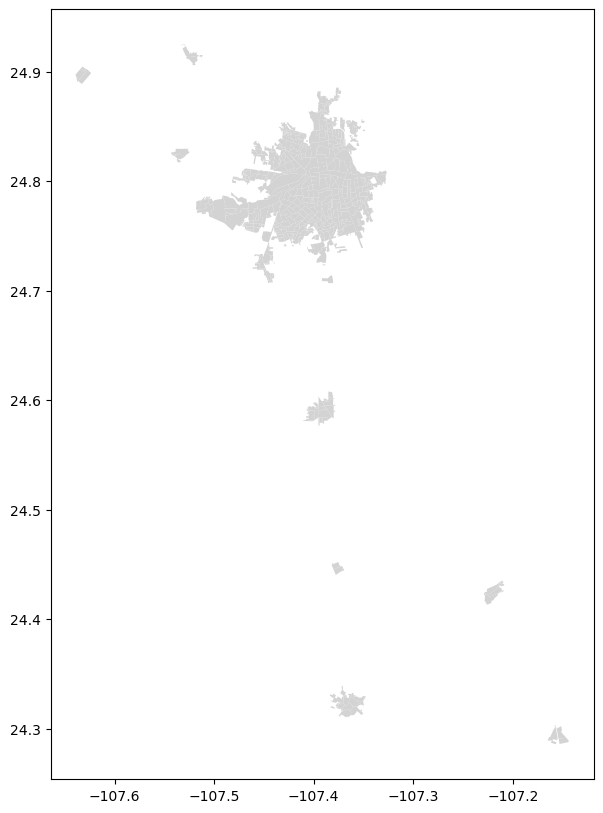

In [2]:
# Plot the polygons
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='lightgrey')

Now we read the collected data from nanostores in Culiacán.

In [3]:
# Read Nanostore information
df = pd.read_csv('equipo22_Database.csv')
df.head()

,ID,Marca temporal,Matrícula (A *mayúscula*),Grupo,Equipo,LATITUD USAR,LONGITUD USAR,Colonia de la tienda,Nombre del Encuestad@r,Reja,...,Deseo de crecer el negocio,Razon para no crecer,Dispuesto a dejar negocio,Salario para abandonar el negocio,Horario de apertura,Horario de cierre,Sexo del dueño o dueña,Propiedad del local,Educación del dueño,Edad del dueño
0,1,45600.73461,A01742526,302,2.2,24.818977,-107.434479,Blvd.Pedro Infante,Carmen María Heras Muñoz,1,...,1,NaN,1,12000.0,06:00:00 a. m.,08:30:00 p. m.,1,0,5,3
1,2,45601.47671,A01742526,302,2.2,24.818063,-107.434963,Blvd.Pedro Infante,Carmen María Heras Muñoz,1,...,1,NaN,1,12000.0,06:00:00 a. m.,10:00:00 p. m.,1,1,5,5
2,3,45603.63368,A01741253,302,2.2,24.819856,-107.434365,Pradera Dorada,Julio Antonio Hernández González,0,...,1,NaN,1,3000.0,07:00:00 a. m.,07:00:00 p. m.,1,0,5,3
3,4,45603.64330,A01741243,302,2.2,24.819339,-107.431235,Pradera Dorada,Julio Antonio Hernández González,1,...,1,NaN,0,NaN,07:00:00 a. m.,07:00:00 p. m.,1,1,2,6
4,5,45603.65067,A01742526,302,2.2,24.820812,-107.431402,Pradera Dorada,Carmen María Heras Muñoz,0,...,0,1.0,1,25000.0,07:00:00 a. m.,10:00:00 p. m.,0,1,5,6


In [4]:
# Use geopandas to create a GeoDataFrame of the location of nanostores
gdf2 = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['LONGITUD USAR'], df['LATITUD USAR']))
gdf2.crs = gdf.crs
gdf2.tail()

,ID,Marca temporal,Matrícula (A *mayúscula*),Grupo,Equipo,LATITUD USAR,LONGITUD USAR,Colonia de la tienda,Nombre del Encuestad@r,Reja,...,Razon para no crecer,Dispuesto a dejar negocio,Salario para abandonar el negocio,Horario de apertura,Horario de cierre,Sexo del dueño o dueña,Propiedad del local,Educación del dueño,Edad del dueño,geometry
201,213,45615.62112,A01743134,301,1.2,24.835085,-107.422609,La Puerta,Andree Espinoza Garnica,1,...,NaN,1,40000.0,11:00:00 a. m.,09:00:00 p. m.,0,1,4,4,POINT (-107.42261 24.83508)
202,214,45615.62302,A01743071,301,1.4,24.834300,-107.391400,Ignacion Allende calle Juan de la Barrera,Jaime Eduardo Gastelum Castro,1,...,1.0,1,18000.0,08:00:00 a. m.,05:30:00 p. m.,1,0,4,4,POINT (-107.3914 24.8343)
203,215,45615.64604,A01743134,301,1.2,24.837438,-107.422209,La Puerta,Andree Espinoza Garnica,1,...,NaN,1,30000.0,12:00:00 p. m.,07:00:00 p. m.,0,1,4,5,POINT (-107.42221 24.83744)
204,216,45615.65525,A01743134,301,1.2,24.837943,-107.425598,La Puerta,Andree Espinoza Garnica,1,...,NaN,1,55000.0,08:00:00 a. m.,09:30:00 p. m.,0,1,5,4,POINT (-107.4256 24.83794)
205,217,45615.68008,A01742931,301,1.3,24.811967,-107.428319,4 de Marzo,Maximiliano Osuna Zatarain,0,...,NaN,1,10000.0,08:00:00 a. m.,08:00:00 p. m.,0,1,4,4,POINT (-107.42832 24.81197)


<Axes: >

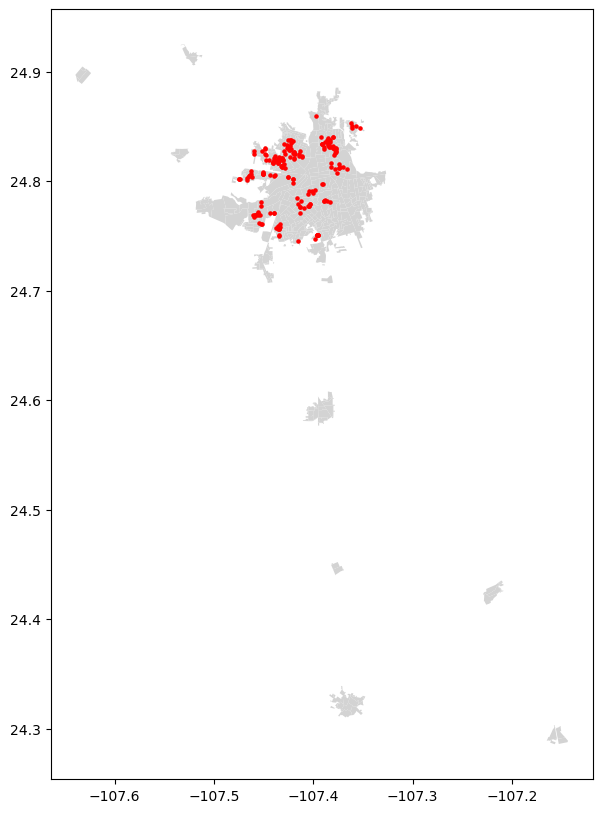

In [5]:
# Plot the nanostores with the polygons
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='lightgrey')
gdf2.plot(ax=ax, color='red', markersize=5)

In [6]:
# Find the polygon that contains each GPS coordinate and add CVE_AGEB to gdf2
gdf2['poly_idx'] = None
gdf2['CVE_AGEB'] = None
for idx, point in gdf2.iterrows():
    for poly_idx, poly in gdf.iterrows():
        if poly.geometry.contains(point.geometry):
            gdf2.at[idx, 'poly_idx'] = poly_idx
            gdf2.at[idx, 'CVE_AGEB'] = poly.CVE_AGEB
            break
gdf2.head()

,ID,Marca temporal,Matrícula (A *mayúscula*),Grupo,Equipo,LATITUD USAR,LONGITUD USAR,Colonia de la tienda,Nombre del Encuestad@r,Reja,...,Salario para abandonar el negocio,Horario de apertura,Horario de cierre,Sexo del dueño o dueña,Propiedad del local,Educación del dueño,Edad del dueño,geometry,poly_idx,CVE_AGEB
0,1,45600.73461,A01742526,302,2.2,24.818977,-107.434479,Blvd.Pedro Infante,Carmen María Heras Muñoz,1,...,12000.0,06:00:00 a. m.,08:30:00 p. m.,1,0,5,3,POINT (-107.43448 24.81898),49,6003
1,2,45601.47671,A01742526,302,2.2,24.818063,-107.434963,Blvd.Pedro Infante,Carmen María Heras Muñoz,1,...,12000.0,06:00:00 a. m.,10:00:00 p. m.,1,1,5,5,POINT (-107.43496 24.81806),262,6499
2,3,45603.63368,A01741253,302,2.2,24.819856,-107.434365,Pradera Dorada,Julio Antonio Hernández González,0,...,3000.0,07:00:00 a. m.,07:00:00 p. m.,1,0,5,3,POINT (-107.43436 24.81986),46,4628
3,4,45603.64330,A01741243,302,2.2,24.819339,-107.431235,Pradera Dorada,Julio Antonio Hernández González,1,...,NaN,07:00:00 a. m.,07:00:00 p. m.,1,1,2,6,POINT (-107.43124 24.81934),46,4628
4,5,45603.65067,A01742526,302,2.2,24.820812,-107.431402,Pradera Dorada,Carmen María Heras Muñoz,0,...,25000.0,07:00:00 a. m.,10:00:00 p. m.,0,1,5,6,POINT (-107.4314 24.82081),46,4628


We can plot the polygons and the puntual locations to visualize the the nanostores location and its polygons.

<Axes: >

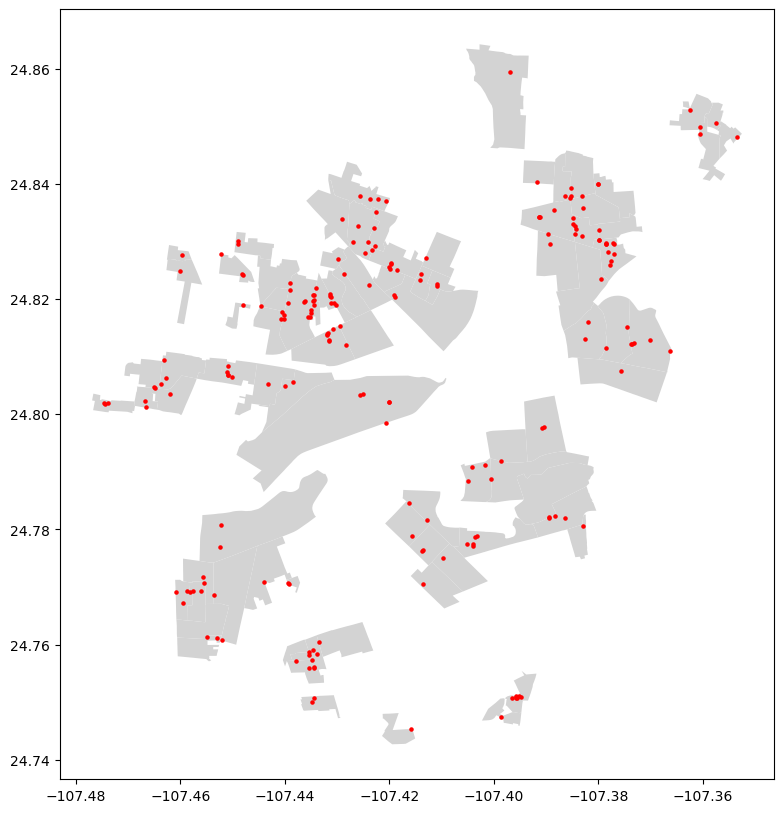

In [7]:
# Get a list of unique values of poly_idx. Eliminate duplicates and non-numbers
poly_list = [idx for idx in gdf2['poly_idx'].unique() if pd.notna(idx)]
# Plot the polygons listed in gdf2 in the column poly_idx
fig, ax = plt.subplots(figsize=(10, 10))
gdfs = gdf.iloc[poly_list]
gdfs.plot(ax=ax, color='lightgrey')
gdf2.plot(ax=ax, color='red', markersize=5)

In [8]:
# List nanostores that are not in any polygon
print(gdf2[pd.isna(gdf2['poly_idx'])])
# Delete nanostores that are not in any polygon
gdf2 = gdf2.dropna(subset=['poly_idx'])

      ID  Marca temporal Matrícula (A *mayúscula*)  Grupo  Equipo  \
174  185     45611.68253                 A01743363    301     1.3   

     LATITUD USAR  LONGITUD USAR Colonia de la tienda  \
174     24.751116    -107.395794              Perisur   

          Nombre del Encuestad@r  Reja  ...  \
174  Rommel Federico García Piña     1  ...   

     Salario para abandonar el negocio  Horario de apertura  \
174                            60000.0       11:00:00 a. m.   

     Horario de cierre  Sexo del dueño o dueña  Propiedad del local  \
174     07:00:00 p. m.                       1                    0   

    Educación del dueño  Edad del dueño                     geometry  \
174                   4               2  POINT (-107.39579 24.75112)   

     poly_idx  CVE_AGEB  
174      None      None  

[1 rows x 61 columns]


In [9]:
colsmain = ['CVE_AGEB']
colsnum = ['LATITUD USAR', 'LONGITUD USAR', 'Año de apertura del negocio ', 'Edad del negocio', 'Trabajadores en el mes',
       'Trabajadores con salario fijo', 'Salario para abandonar el negocio']
cols01 = ['Reja', 'Miscelanea o Tienda de Abarrotes', 'Fondita/Mini Resutaurante', 'Verdulería o Frutería', 'Tortillería',
       'Otro negocio', 'Razon de las ventas: Violencia', 'Razon de las ventas: Conexiones', 'Razon de las ventas: Temporada',
       'Razon de las ventas: Escuelas', 'Razon de las ventas: Otras', 'Credito Bancos', 'Credito Proovedores',
       'Credito Familia', 'Credito Gobierno', 'Credito Ahorros populares (tandas)', 'Crédito privado', 
       'Se recibio credito del banco?', 'Deseo de crecer el negocio', 'Sexo del dueño o dueña', 'Propiedad del local']
colsord = ['Prediccion de los trabajadores',
       'Nivel de clientes del ultimo mes', 'Prediccion de clientes',
       'Ventas en el mes', 'Predicción de ventas', 'Cambio en el inventario',
       'Prediccion del inventario ', 'Opinion sobre el inventario',
       'Cambio en el precio', 'Prediccion del cambio de precio',
       'Impacto Crimen', 'Impacto Credito', 'Impacto Incremento de precio',
       'Impacto Competencia', 'Educación del dueño', 'Edad del dueño']

In [10]:
# Construct a Dataframe with the unique values of the CVE_AGEB column
dfagebs = pd.DataFrame(gdf2['CVE_AGEB'].unique(), columns=['AGEB'])
# For each column in colsnum compute the mean values for each AGEB
for col in colsnum:
    dfagebs[col] = gdf2.groupby('CVE_AGEB')[col].apply(lambda x: x.mean(skipna=True)).values
# For each column in cols01 compute the proportion of 1s for each AGEB
for col in cols01:
    dfagebs[col] = gdf2.groupby('CVE_AGEB')[col].apply(lambda x: x.mean(skipna=True)).values
# For each column in colsord compute the mean value for each AGEB
for col in colsord:
    dfagebs[col] = gdf2.groupby('CVE_AGEB')[col].apply(lambda x: x.mean(skipna=True)).values
dfagebs.tail()

,AGEB,LATITUD USAR,LONGITUD USAR,Año de apertura del negocio,Edad del negocio,Trabajadores en el mes,Trabajadores con salario fijo,Salario para abandonar el negocio,Reja,Miscelanea o Tienda de Abarrotes,...,Prediccion del inventario,Opinion sobre el inventario,Cambio en el precio,Prediccion del cambio de precio,Impacto Crimen,Impacto Credito,Impacto Incremento de precio,Impacto Competencia,Educación del dueño,Edad del dueño
83,3032,24.747468,-107.398670,2023.0,1.0,4.0,4.0,30000.0,1.0,0.0,...,3.0,2.0,2.0,2.0,4.0,1.0,1.0,2.0,5.0,3.0
84,6874,24.801780,-107.466592,2018.0,6.0,2.0,2.0,40000.0,1.0,0.5,...,2.0,2.0,2.5,2.5,3.0,3.5,2.0,4.5,5.0,4.5
85,330A,24.819042,-107.448013,2023.0,1.0,2.0,3.0,50000.0,0.0,0.0,...,2.0,2.0,2.0,3.0,4.0,1.0,2.0,2.0,5.0,5.0
86,017A,24.829798,-107.448925,2019.5,4.5,2.5,2.0,25000.0,0.5,1.0,...,2.0,2.0,2.5,3.0,4.0,2.0,4.0,2.5,3.5,3.5
87,5556,24.824892,-107.460003,2017.0,7.0,4.0,0.0,30000.0,0.0,1.0,...,3.0,2.0,2.0,3.0,5.0,1.0,1.0,1.0,5.0,4.0


In [11]:
# Open Excel file AGEBs_2019_Sinaloa.xlsx
dfsin = pd.read_excel('AGEBs_2019_Sinaloa.xlsx').drop(columns=['Estado', 'Municipio', 'Localidad'])
dfsin.head()

,AGEB,Negocios,Ingresos,Gastos,Edad,Trabajadores,Trabajadores_Hombres,Trabajadores_Mujeres,Credito
0,0012,6,823.000000,508.666667,14.000000,1.333333,0.666667,0.666667,0.000000
1,0027,4,435.750000,266.000000,18.250000,3.000000,1.750000,1.250000,0.000000
2,0031,10,312.200000,236.400000,19.600000,1.600000,0.500000,1.100000,0.000000
3,0050,13,266.923077,173.461538,11.692308,1.230769,0.230769,1.000000,0.076923
4,0065,11,348.545455,235.727273,13.000000,1.545455,0.545455,1.000000,0.000000


In [13]:
# Count the number of AGEBs in dfagebs that are not in dfsin
print('# AGEBs not found in the INEGI file =', len(dfagebs[~dfagebs['AGEB'].isin(dfsin['AGEB'])]))

# Print AGEB from dfagebs that are not in dfsin
dfagebs.loc[~dfagebs['AGEB'].isin(dfsin['AGEB']), 'AGEB']

# AGEBs not found in the INEGI file = 30


0     6003
2     4628
3     4613
12    750A
13    7463
16    8616
17    0663
18    3920
20    3916
21    8423
23    9474
24    0536
26    3297
27    4011
30    7321
35    6677
36    6681
49    4469
55    0625
56    7181
59    7393
60    7209
63    4632
71    7514
72    8870
75    4897
76    6925
78    6709
80    5185
81    4736
Name: AGEB, dtype: object

In [14]:
colssin = ['AGEB', 'Negocios', 'Ingresos','Gastos', 'Edad', 'Trabajadores', 'Trabajadores_Hombres', 'Trabajadores_Mujeres', 'Credito']
dfsin = dfsin[colssin]
# Merge the two dataframes on the AGEB column
dfagebsall = dfagebs
dfagebsall = dfagebsall.merge(dfsin, left_on='AGEB', right_on='AGEB', how='left')
dfagebsall.tail()

,AGEB,LATITUD USAR,LONGITUD USAR,Año de apertura del negocio,Edad del negocio,Trabajadores en el mes,Trabajadores con salario fijo,Salario para abandonar el negocio,Reja,Miscelanea o Tienda de Abarrotes,...,Educación del dueño,Edad del dueño,Negocios,Ingresos,Gastos,Edad,Trabajadores,Trabajadores_Hombres,Trabajadores_Mujeres,Credito
86,6874,24.801780,-107.466592,2018.0,6.0,2.0,2.0,40000.0,1.0,0.5,...,5.0,4.5,12.0,501.833333,252.250000,5.666667,1.750000,0.583333,1.166667,0.250000
87,330A,24.819042,-107.448013,2023.0,1.0,2.0,3.0,50000.0,0.0,0.0,...,5.0,5.0,6.0,355.333333,193.833333,18.500000,1.333333,0.666667,0.666667,0.000000
88,017A,24.829798,-107.448925,2019.5,4.5,2.5,2.0,25000.0,0.5,1.0,...,3.5,3.5,23.0,316.434783,214.956522,19.130435,1.956522,0.913043,1.043478,0.000000
89,017A,24.829798,-107.448925,2019.5,4.5,2.5,2.0,25000.0,0.5,1.0,...,3.5,3.5,21.0,193.095238,139.476191,13.619048,1.238095,0.523810,0.714286,0.047619
90,5556,24.824892,-107.460003,2017.0,7.0,4.0,0.0,30000.0,0.0,1.0,...,5.0,4.0,13.0,612.230769,403.076923,8.923077,1.769231,0.384615,1.384615,0.076923


In [15]:
# Save dataframe dfagebsall to a csv file (UTF-8 encoding)
dfagebsall.to_csv('dfagebsall.csv', index=False, encoding='utf-8')